In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from wordcloud.wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
review = pd.read_csv('review_modified.csv')

In [4]:
Cust = []
for i in review['stars']:
    if (i == 1):
        Cust.append('NEGATIVE')
    elif (i == 3) | (i == 2):
        Cust.append('NEUTRAL')
    else:
        Cust.append('POSITIVE')
        

review['SENTIMENT'] = Cust
review['SENTIMENT'].value_counts()
review['Text length'] = review['text'].apply(lambda x:len(x.split()))
review.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,SENTIMENT,Text length
0,0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA,NEGATIVE,39
1,1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg,POSITIVE,274
2,2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw,POSITIVE,109
3,3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg,POSITIVE,68
4,4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ,NEGATIVE,673


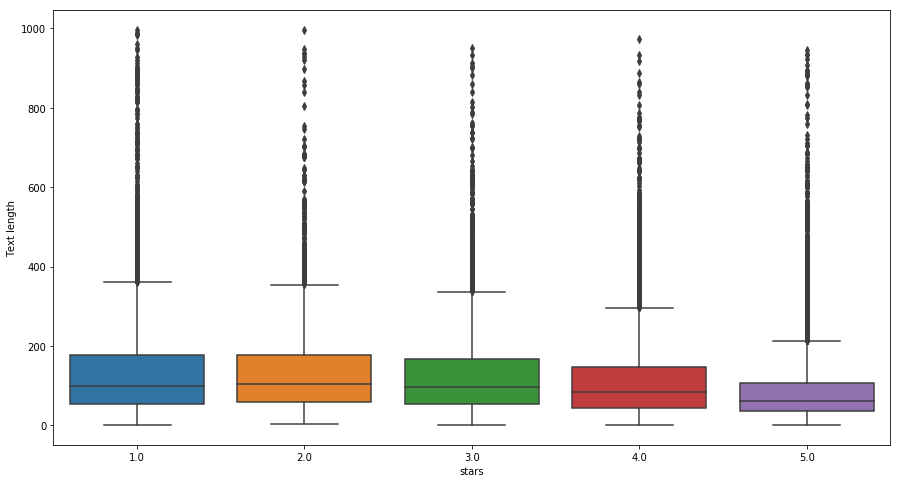

In [5]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'stars', y = 'Text length', data = review)

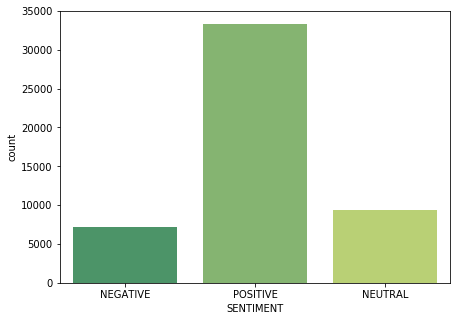

In [6]:
plt.figure(figsize = (7,5))
sns.countplot('SENTIMENT', data = review, palette="summer")

In [7]:
review.groupby('SENTIMENT').mean().corr()

,Unnamed: 0,cool,funny,stars,useful,Text length
Unnamed: 0,1.000000,0.955225,-0.843665,0.994605,-0.985596,-0.915535
cool,0.955225,1.000000,-0.647040,0.919380,-0.991504,-0.755528
funny,-0.843665,-0.647040,1.000000,-0.894804,0.740721,0.988354
stars,0.994605,0.919380,-0.894804,1.000000,-0.962737,-0.952321
useful,-0.985596,-0.991504,0.740721,-0.962737,1.000000,0.834324
Text length,-0.915535,-0.755528,0.988354,-0.952321,0.834324,1.000000


### Cleaning the Review for BAD, NEUTRAL and GOOD by removing the stopwords and Punctuations

In [8]:
from nltk.corpus import stopwords
def text_clean(message):
    nopunc = [i for i in message if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostop = [words for words in nn if words not in stopwords.words('english')]
    return(nostop)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv_transformer = CountVectorizer(analyzer = text_clean)

In [10]:
x = review['text']
y = review['SENTIMENT']

In [11]:
x = cv_transformer.fit_transform(x)

### Training a Naive bayes model on Reviews data set

In [37]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predictions and Evaluations

In [40]:
predictions = nb.predict(x_test)
predictions

array(['NEGATIVE', 'NEUTRAL', 'NEUTRAL', ..., 'NEUTRAL', 'NEGATIVE',
       'NEGATIVE'], dtype='<U8')

### Creating a confusion matrix and classification report using these predictions and the original values

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[1444  526  132]
 [ 410 1426  983]
 [ 443  503 9133]]


             precision    recall  f1-score   support

   NEGATIVE       0.63      0.69      0.66      2102
    NEUTRAL       0.58      0.51      0.54      2819
   POSITIVE       0.89      0.91      0.90     10079

avg / total       0.80      0.80      0.80     15000



## We find that the Naive Bayes predictor performs pretty well! It helps us recognize 80% of our test data correctly.

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [13]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

C:\Users\Kotak\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
predictions = logisticRegr.predict(x_test)
predictions

array(['NEUTRAL', 'NEUTRAL', 'POSITIVE', ..., 'POSITIVE', 'NEGATIVE',
       'NEGATIVE'], dtype=object)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[1496  381  225]
 [ 400 1411 1008]
 [  85  506 9488]]


             precision    recall  f1-score   support

   NEGATIVE       0.76      0.71      0.73      2102
    NEUTRAL       0.61      0.50      0.55      2819
   POSITIVE       0.88      0.94      0.91     10079

avg / total       0.82      0.83      0.82     15000



# We find that the Logistic Regression Classifier performs better than Naive Bayes!! It helps us recognize 82.00% of our test data correctly.